<a href="https://colab.research.google.com/github/abhitall/TomatoDiseaseDetection/blob/main/tomato_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
download = drive.CreateFile({'id': '1PeEprh5bWD_Ap3aZwknfMpJuEBTUujAj'})
download.GetContentFile('TomatoData.zip')

In [ ]:
!unzip TomatoData.zip
!rm TomatoData.zip
!mv TomatoData/ dataset/

Streaming output truncated to the last 5000 lines.
  inflating: TomatoData/train/Tomato___Septoria_leaf_spot/fffee500-8469-4c0f-a17d-d95c5516b446___Matt.S_CG 6210.JPG  
   creating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/
  inflating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG  
  inflating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/01027422-5838-4aaf-a517-01ea4e2cb6b9___Com.G_SpM_FL 9256.JPG  
  inflating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/012369f5-ca64-4811-888f-35d75f7f7c2b___Com.G_SpM_FL 8911.JPG  
  inflating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/01720a27-7595-496b-bf53-dbe5c8c1e2c3___Com.G_SpM_FL 8476.JPG  
  inflating: TomatoData/train/Tomato___Spider_mites Two-spotted_spider_mite/01854aac-d409-4136-b885-3df6943cc349___Com.G_SpM_FL 1374.JPG  
  inflating: TomatoData/train/Tomato___Spider_mites Two-spo

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.
Epoch 1/100
50/50 [==============================] - 87s 2s/step - loss: 1.9980 - accuracy: 0.2419 - val_loss: 2.2726 - val_accuracy: 0.1063
Epoch 2/100
50/50 [==============================] - 76s 2s/step - loss: 1.5722 - accuracy: 0.4075 - val_loss: 2.2153 - val_accuracy: 0.2375
Epoch 3/100
50/50 [==============================] - 81s 2s/step - loss: 1.2995 - accuracy: 0.5398 - val_loss: 2.1292 - val_accuracy: 0.2750
Epoch 4/100
50/50 [==============================] - 76s 2s/step - loss: 1.0605 - accuracy: 0.6313 - val_loss: 2.0663 - val_accuracy: 0.2781
Epoch 5/100
50/50 [==============================] - 76s 2s/step - loss: 0.9138 - accuracy: 0.6719 - val_loss: 1.9259 - val_accuracy: 0.4906
Epoch 6/100
50/50 [==============================] - 76s 2s/step - loss: 0.7049 - accuracy: 0.7419 - val_loss: 1.6955 - val_accuracy: 0.6875
Epoch 7/100
50/50 [==============================] - 76s 2s/step - l

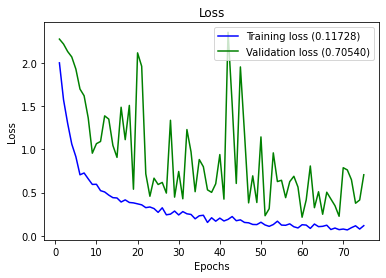

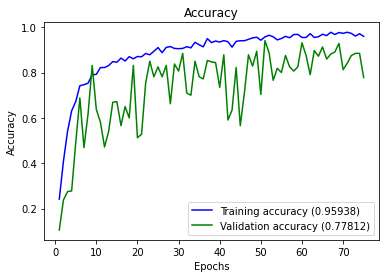

In [ ]:
# Part 1 - Building the CNN

# Importing the keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Initialising the CNN or classifier
classifier = Sequential()

# Step 1 - Convolution, pooling!
classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(256, 256, 3)))
classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=2))
classifier.add(BatchNormalization())

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN or classifier
classifier.compile(optimizer = Adam(learning_rate=1e-4, amsgrad=True), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plotHistory(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()    

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./dataset/train', target_size = (256, 256),batch_size = 32,class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('./dataset/val', target_size = (256, 256), batch_size = 32, class_mode = 'categorical')

early_stopping = EarlyStopping('val_loss', mode='auto', patience=15)

try:
  history = classifier.fit(training_set, steps_per_epoch = 50, epochs = 100, validation_data = validation_set, validation_steps = 10, callbacks=[early_stopping])
  plotHistory(history)
finally:
  classifier.save('model.h5')

In [ ]:
# upload weights file to google drive.
upload = drive.CreateFile({'title': 'model.h5'})
upload.SetContentFile('./model.h5')
upload.Upload()
print('Uploaded file with ID {}'.format(upload.get('id')))

RedirectMissingLocation: ignored

In [ ]:
import numpy as np
from json import loads, dumps
from base64 import b64decode
from tensorflow.io import decode_image
from tensorflow.image import resize
from tensorflow.keras.models import load_model

model = load_model('model.h5')
classes = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
b64_image = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDQ35GCx5PSk87YejOVOOD0qPIdfldR3GOtL829sL8x6c9aCx+/lmQFSf4duM0KzOMldvfJpSr/AMI5AwTjim79z8ZGeCSaAHFgSSWbIOSO2KApxkYwecnmiNQuQQTuP504ruyCo47GgAUbcKoAIz/nNMDAsCFO0juOn4UblVAc7RnvxQGBZjvPTgUALyyKWb/x3H/6qcegAOOO/Wmct0JOOnofagsAoyTgdu4oAduXb9ffrSiUNna3HcY71FvJzlTjA/CsHWfEH2OY2VkEe7Py5IyEzjHHc9Ppj8KG7bgdKfvEhMkDjHc1VkvreBiryIHUcjJJ61wSeHtSeR7iS9k+0SH5ptxPWr0Wk3ahi8sby/wuyHK+/BAP+eKw9vDox3j1Z0S+INOa8S2ZyhfhXcZQnPQHpmtdlxIDhfl6c8muFvLaVJoHBDtu3OVj7+nfjOepPXqa0LbVL21BSKBpI1yzh22gc/w55rSM1JXFddGdWGb5sjH49Pao2ba4K5GBjpn/AOvWN/wkUXyie3uYXIwSIt6rn/a7/lWrHcRXJDRXAfHXBAPfqP8A9VVe4EwO9T19txwP/r0wsVUDc2QcZBwPzNRIDICCU25zyowD9fzoBA+Vh7A5OPqKYEo2ZbgH6fxH+tMG5TggY9h92ldSAdvPGeTxn6U8AHnBKnoRQA1WIACninYYluR9cYoVlBfGRu601SNyoM7sdicAUAKQwOBgcdR3o5J3DOB6e1OU784JAHB3LzSBSSRtbI70AOZsx42gDFN2tuJAHTr1o3g/dPHoeMU0Etkkcqe3f3oAGcAcjPPWoCCzsQp2/wBakJPmbW+9j1/yamAQA5bn16ZoAYm8AKGOegAGSfrUxYbD97HcgVHuL54yRxk9KTkkDPJP0yaAGL5f2hgFIPXgdfxqVxwgA7enFQgors2NxA5IXmgFnXIQkseTQBJKCyYGTgdB3puASG2jAHJFMVyV2lSMH5sdDinM+Cq4fnIxxj8c57UAKSg+XdjPIBOBik3ZYhATg4yR+vvQjBgeuCc9eRQTtDNu6jnnGBQAxuijKkj070bRsAPy4xwec0kbb2BKggHg4x/nrSF/MVscP/tdAOv8qAGAlOUYAE/xYwf8/wBaesmQSRsY44/Com+Z+2MYz6VBe3aWqCRkkZiPkVFJZj3x+YoAj1LUBZaaZI4y0ztsRTnrzyfYAE1ymlWe65a9vJpGcElDu4LH7x/p/kVcsVtb26e7vrjFxJ/yxXcEQ9OP8/410MMNqE+QIF7AACuDE4i14pDeit1KDXG0gg5HT7uaUS4GCw564qa6tYQQVm8sY555P+f6VnTXHlKVj2tnrg1zU5X+E55prcnklXcAu9R7gD8sdacJ33KC2eAAPp/k/nVPd5sStwr46Ajn9aTcjLjJAHHAzyen54/z0rrcpLQxNAvE6YwVHf0NUms7a3ZJYj5EmPleP5SOvpTfMfcse1cA4JBx+dQuS6lXJXnse9TG/cpTcdjWsNb6297IqzgZWUfdbHr0GetbgnBYKckk8ZFcR532bgMMgY46VZsdeazbbN+8iZxsI4KZzx7jJ/8A111Qm3pI3jUUjsTtz8zMSTzkdKUEs2FyMHrkYx35qmkyzQiaFxtYZXHTHpx3qaJju5J3EfeHYflWpoTLGAPbsMkU85JIyMdfxpp3MGRflJzyD09KRWyTypYZBx0HrQAbjuVWxnGPmPJH+e1Kx2rlt23qSTkEYqNeu1omAxgj/wCvUmGC4XD8DvQACRXk2EY9DmkJMfIwFbnk8UhR1wVACgElsf1zTxu2nYM+uT/jTAbliXLocem4mnLgjGFAX271EEZeFOdo5U/SpA/ACsFzjGef6/5zQABhkEsvHYHn/wCuaCDxuJJz/ezSn77BkxjGDnrmiMKy/IBwcEAjj8qQiEKo4JbAxwRyT+NPXgDYSB34x2pvlFlPJyOhHGKkzhSHXkdcHt7/AOf50DGMCoLAlQeeBnFI3KFSQhxkkAc/gaUOTzyVHA9+KQsGB+TAU8jrmgBFYPuJXhPU9etAfblTwRjI65ppdQCBu25IOBTww+T5Ru9vegBj7Uj3clvvbsdff2pkGcyBQRhuM85OPf8Az+VPcgcjaFU4qCRw2Q2ApOM//r96AGuwBCbsYGeeeKxLsT3urCREXyYR5fB5JyTnPTjOK07idYbOWSUfLEOBkc+x/E1hWk12DL5rITMWf5SSFPTr/T24rGtJqOgO9m0an2K0UBgqK45GMA5qvvWIkRAgDpzx+NVdx37iTkjjHrjj+lQF3UAFsnqWx/nFcahfdnG5M0JrqO4T5sqwBwcVVaxeSTeI9pIAyDgEY4yOlQF5FZpCd3q3b6VPFfYTaQFzxgdqfK4L3RqYNE9uAjlcdiDwab5oxhAoZx1A5qM2zyv5jSMQensf8io5D5Ny5RCR2yevfNXy6XuItxgE+n4UkgG0bXGAOcHP8qrje5yNicZOTUahVB8yUEg55qUnfUCvMrfMwXIHOeT7fgKiB3qQQGyCMN/SrEkimRRuGCeXIOB+majXy4pGHysuCB3xnPNbpaCLWn3psJowoJt2b96pfAA45x6jnjv0rrbaeOdQ8cqyJjcpU5wM+oNcQZcITlQCcY4BP4Vc0m//ALOkeORXe2lIDKASEP8Ae+vsO30xVwn0Z0Qmnoztw+77pPXJPTP4fhT2fcCVwMZIOKpQTLKQVcOAAWYHse5/nVmPhySeSuOPQf5NbGhOODywwDkgUeYMch+nHNR7yVKkfMCOGI6UuQFLE7h0wBxQMUZJOFHryM1H5yCNvlKqMcHgYqTJJwCD9Bzg9KQqXwAoYfTkUAOxuT5QAx4yeM1Hn5AVJVlHVgf896cigONoyBwB2/CnOGIXKjKjOcce/wDOgB0cm8IGGRk43A8U8EAZA9hxUIlVW2vhFyPbcadG24HDZAGM9cf54oAhUFcyIzNkZIHGRTMuxLnbjI4bnt9elPPAYK6/Nwdw+v8AnmmhXKqVAZRyOOBzz/kUALlgSoOSRnIPWmuWYqVc4754xUnJXBxuzkDPOPy+lRF977Bgk5Ab1H9aYAHUrwV2jqRwMHr/AEoRlEhyPc4XpzUYO6UgKxXnuc9uf8+tMkKOG5Ay2QC2P8PekA55FLgnD5IxgfrVW6vorZWab7ucLgep4Gac8qMwLEfMOeOOP/196xteuWCWoRjvE4baeOgPT164pN2QEd5I99ON2zy1yVAJHPrnuff2pmBGGBAwSc7fXvSbwR0bae/QH/DpUTuSDkkA9OuCa425S3OOU5MkRiF3FvpkdPp/ntSYPJ2sAD6cn8KiWXcSSDjuuPSrCksoyORj+X86drEjChRQWBz2PX/PamOmSD8oJII6YJxVhpt24lQBgZA/XjPr/ntUUrwpbhvORRjAy3I9P6GmmFh6kBAudpwCCDnmobmaW3ZXjiVxjLc4x6f0oh3bVIIZCM5HQjipbuOKSKNMMGU5yDxjsD7/AOFUoxKi0nqZu/UnYyzQgrgEYcqD0Pv6f0qTyXeHfPGIgT0VycfkM/lVyVGljCnDex54qNLXaAeD8uQMYyCPSp0LdRPoUhCxKohzuPHzZPp/WojzIQXyfTqMj1q8yrHkheBxgjiqr+YjEwbTvUl0UE8A55HpwD/+qtFqZ7jlDRNlw0bqc4+6Qf6GlDrI5Xk8c4GfwqtiRiC0hBJ+6PT/ADmn7QCNyuRgdCf0ocQNLR9Ra0vPsrk+TOR5ZOSVbHYduwx9K6mGfcuZD8+cEYzjNcVK0ckXkkEqORtP5c1s6VrQkm+y3LqJQMo4AIOc/gDmqhO+jOqErrzOgLygECMhFHy/NnP1qwgk3FmIJA6jmooiPLDD5B1I2leO/wBPzqwnygK3LZ7CtSxMHAJODg8K3+fanDIPKZB56/5/yaUEBcDIVs449f600qqMWXHrySf0P/1qAHs2ATwRu647e1D7gcYzk9lPFIp+Y4bcAcH5cY55p5TfGSpyVwMZpiI2ZGYIVyCcnI4x0FKrRspVGx7/AN6nMnmZ8whwSc5GcUi7FynOecf56UhkJMTfMUIPX+6cYqH5o2bLuIyflGBz2HTnvUm4ttDFSVOeDjPp7UMSG3YUEck9RQASSLGm91Ow8YI5Pr9KGUSIPlXGcgj86QynhivI78EYP+RSO0h+7ghv4h3z6UARyEnhRyR1Vv61EQXIDFwR05/L/GpncKMqBjnjj/P+RVbcdpGQwJ+YDr+v4fnQBEw5KIN2fmyo9+n6/wA6xdTEk1/HC3yqF+UnO7dnnB6dh164rZfaWyV5OMKOR71zt9cSNrcUQUExAOVBAx78Hntx71FT4WHmNkdlYbh098ZNOWVW+8SSPunPIIHTH19/WknmaZyCF4Yt09e36VWyihcHr6Hk9ffisIo4XuThhuAZSpbozcY96liDbR8+QByM/wCeKpRqXIUnnOOTj86k811O7OQpxwP8ira0AuNmTrg4HTNQywRyS5aNWHBDOoOOKs28pCHLkc88/rQ0XygYOSTkH0rNStoCdhIfLHEQUjPRelOfYS6MRtHPTr3/AC9qiVTGqhRkBvXGKZkTXAffuU4GARVRWo0SoDIN+1xg4yT1pzSPHJtxh8dDg8f5/wAikXILIOoOOvXrwPWncOWI2lypByM0NaklZsEFm7HGPTH8qpynbAwCsEOCeeM84+vBNXJIzhQ2OvIDAce1VJl8pATll64HcDn+prSCGhqptjDtg57Efpj0px+6cgdeNuOfX6daQM7YG1cdBx9KcIGSQeYpzjjcPwJx9aqwDHDSBsHkkHGAMZ9BSFB3fDDoe+e2PerKnyzwFzjoR7UwRZOVwME8gjHHpxUSS3Gpdi9Za1cW6RwXmJ4eAXwdy9OSe465z+nfrrS4je2WVZQ0ZAwyE4bjt06dMc964lYUWF3dtwCk4HTpWj4fke2hFu8jNsOEYZAbPT+lOnUvozrg3KN2dYh3Ence/wB00IrkhSM7skttyBgd/wDPrUaKoG5iMEZAGevB6euf5VJG++PIHJ5HX6YFbDAD+FSVHoTjJpqOikkbVQLkkH+dKp+cyqcvwoPHT8qjTIX5UO44wB1PXI5+lIZKs21QCCO+MfUdfwoSUSKAig7jwM5z9PyP5GguDFnjHUZwOP5dc/55qM7dh82JlxwuG6+nQ0AMKbQMDDHlhj8/al/d7Ado4YcA96jztcIuGUEYG7Hvx+n5Uq8ghQdpPTbxn8P88UDFwMg7twBwM9Oaa7fOOpGcYzjI+lI4LnazFeQWwelDtGyqibdzDoRnGMe/6UCHl1B2jOSchSe3r6d6q9PmGDnjrxnFSMQrqeA3RuBVSTOGyeD82M5/z/KgCC8vI7eyLSZYDkKp5J7Y9+awYLWW7ml1D94vmDO3aRhcgZP44q5qskbQfZvLkeUfvFZVHGOAenT6c8Go1u7kwqJo9gH3Du529hjHB/EfSsKzexM3aNyKaMcnAyehFRYLgbsnucdKlkcPnDjk8A/zqFY5EG4BiCeD2P6+1CWhxkePMICueDwaVQEAYgkZwSRmlC7d2AeOgzihVxk7nx2G0VaAVWaNgUO4HqvvzV5H/eAMQq/3x2/xqim53xGivgcqwIzj364xTomMLeWzDO7oMkY9M/8A66icE9QsaJgS5j5BCkdOv6fnUf2HySPmyM+gqLezxhVfa3fp+XtU/mmMhZ5U+Y5BzWN5R6lRV9hbhQsm+Ri6vnbn8OoB/pUgaJB8yBGHHPXisj7b9oBjYSoUBYlQCTxkADtnHr3qSLzoY4w7F1cAjzcbwSB0wcZ9vatJRb1NPYyauWrp1CkbsBc/5zVBiJDhQNu4jhsY/wD1Uk04kQlTgjgKVBoRUyW3bWJzt9PTGefXrWkNEY2aJxHH0TjBPJ/zip8kKFLrnn73Tp/9YVDvBPJHtz1x/wDqqRuAGcjkYxnv35qhEOxmywViC2AQuRwMmlWLhSuWx94nOafJKuFZOCfvd+nQfX378Usbcj5lUgj7x4/WlIBzMSrgsQDkbVJ6Ht64/GotstvcxTWUZJB+YZGMd+vOcfh+tSsybwP4enUfpT0ZWl2qoGVBJUdTwPz71k/d1RpTqOLsdFp90s9vHLHMNj8KOgPsOauxuTErKMAZAP8ALtXL6CzRNJbFzIEcD5Ru4P0/z710cRwqAcbuSc8Hj369a6U7nWSEfMI3IbPU4605GjxkLhUOM56enGKUHzgGwf5ce3600IoYFceZ/dHOfrTAfGFV2xtIOCQCQP8AP+NL0Pz4IOeTnjioySN+ANuSCD17cdORSo8MiEEFm4ypXkex9PXmgCHakWAVwXwAmMNn/J6/WiSbZIQ3GDluMk+/+fSkHzsnlvIAvBUncDj9fxqOWMkGV2A5PAFIYwYeQjJwBx82P6VKwAc/OUUdh9PT8qiD4wpP3eORkY7dakIkKK23KZILE45/z3oAgfLTPGoJxyTn16j+tZ2o3b21uX2726A9ADkAVoyuA771LFgABjjcPf8Ax9KxNSEphkxtB+XqcZwwOM/1pPYRUtUaGFllbcX5L4+bn9B/nimyO2wogDZ/i6k1YdnlEXmqsbEDdsbOPQnOO1Z7FleSNiuAefmGDj3HFcqTbuzkqSbeokaOxGflXJw7Zxj8Mn/9dTIr7PMfLYxkZJx6fzp1upcZ3Y74x/nmmtcwbyFkQPn7pbmrU0nYhJsYGRlyvXqNwyRRvAwSGA+lRlgJmwBt7bR3x/8ArNWQIwQoUMDwWzgg+w/L/PFWDEKx5/d5fJI3Y7dj7Ux0Migb9zKPlB7n/OKcUZT8r7c9Qf8AP1oUvuPce3H+e9O4CRMy8NncOOcDBHtn2qy8yhT8vtgnk1BMu9mfzcuT1yc9yTz/APW60kTEE8EAdwvOf85/KpkkwGGRFmVzGNkoxuLcZx7/ANfapUMToJAkIYqCOnA/pUXkMWQ+aoVGDBF65AP+elS3EJjndgFZc7h789M9+vNOyNJSutCGVlZ8FgScepGM4wO//wCo0/KDHdQeSKgQSM+X3em7GAo6Yz6AY/SpyY2C7MA8E5xz36d6GZsdBMrRnhhhSACpPTHpnHWoJZgZTEjZ4B3HKjBOB1xnv+R9KkeQpDw2CBtweTs64we1Vinzlnw29iSp654Gc/489aDT93a46NC4ChRkfxbh+tXMor7tmVycE8H2qJSxXiMDLHndgn9fXFL8zSqTgHoRtyen+fzoMidXBbKiMlhjA9qkVwVJxt4wGX5cVXEW9h5jN0/Ej/PakZgCBHyOp55NRKN0OLs7lrTR9i1E26yKY+qBTkggZ6j8a6aNmEaGMpjA5zkD3Ht/j7VymAHaZFCHPBOGPtzjBroLC9V12uQkkeRIjDJHP8un54rWnK6sdimpLQ1F3ITnIKZxgk5HHXP0oRo2VQFLLxgj7x4zz6//AFqInJVVIBBPBHPv7epqKWbO3MBHAG4YJ69c59CKsotAFJSMZzguP8Paomcbxwzq2QeRx1A9vXikcupZxCzc4ULxgevPbFODMkZlALoT8wAzu47igCABh8o6jGFAA69cVIGzIy/eI67e1RZGVRZN3HU4brjBp0hXcSeccDI/z/kUAQYEgbKlcnPJHb/9VTsSFK87erZHT8c+tQvKwXO0kgDaFPI9B2qhe3bwxTlCRgZOScgkccfU0ASyXaB/J82EMQcqzgHHY4NYt9cLPDG0KM8Rb5mxt46gcj8x7YrNhiC4uJSWlkUtycZzwSccHNWojsi2xgJnhs9MDt9KwlVeyRE5qOnUR3Unb/D0Iz/X/wCtVZiAAvcA49KkkgEkmUcDscHOO3pxUYjycOxLHgYxz60oo5HuS8KpVmbjgr/+uoJLVC4cDHp7jI/wp6O69A24HPt7n+VCnALnJGM9eD+NUlYak47EZgKu2STnOBuIxxx696I5AsewBcjgnBBHt6dv1qyF3QmRQqheMFuT+H/6hUDoX2KCqEeoABx2459KrcHK+5MAdqqc5x/nvU0LDjc2OvzDn8qqJI6FVaLBxjkjnvnHbirKKMZ3H8RSZLHbFDYDcdgOf89qc8O5eEG7dw3OSP8APt3P4IpLliGUgdVY8nn0NNme4Vz5YgK8AblOc59s/wBKlMcVdixgxzYkyAOoC5Ldx/8Arp0xASNmkBITaoB644/XPf0/CleeMwOjo5kGNsm4gHnpgjpj/Pqy5wlrAMknLHgcAHH5Hjv69qouUeUr+U5B+U4PGcDH5/gakRAV+YHj+I/5/wA5ojOVXBHc8NSR30M0vlJjd0X/AGvp/n/66uQk3sRln3bWzsHOR7/X2xTsq8mTgFufkIGPfioIzLJNtCqUViDg5J57/r+dXFiIUqUO4c8ClKaWjCSsMJOF24BPy5bjv68UMJNiqMBWxjqMj/Dj9Kk+zN94rgjuOKcFFvCbgJuYHARR83+9kYHFJSQkrkOJYjvVuvOO30x39MUgjCynvJ1wOBn+v+frT4DJOzL5UqNjqy4JFacOlSmHP8Xp6e1TOpGK1L5JdiukLPgMNucfdFSR3H2K8ijUgAhg25seh6fgKuG3EEW9zhgOd3+J/wA/0x55JZr6GOWMKoYOrY7c/wD1qilJyldG9KDWrOtSXeu45Ue5wM+tPXYWYgHOMlcfd/X6VnWrBFRRzkZIB56cc96vwsUwrL8xH3sfy4967DYmDLj92GwQAQBgn3/rx6VIApwRtJJwCWzyR6/561W2gylFDcYPXuaAjB1VTuYnuv4nv70XAaZCI8qOucqeAB9e9RMzIHA4AJz7E9uRj0qJzIrEMypg5xngd856+/alDOG+UZxyOSCB60wI5HcxkpjJ+XnkdOeP89KydRkMiMsY+aRuuCPc4/LpWpMA8ALZGScsCeORWUyid0Xcg5bY5PCn15pPYSM5lbcomk3MuADuzgDoKercDLEelLcbnCkqBkEn5cnOD/XA/wD1UyFIyG3TBJVXOJMgMMZGCM8nj2rCKucc23K7HMwRjtIODk+5pmw8OWAH90kYpGA6fKMHHcnNICQnO0g8E8df6VaIDLMOQxz6g/nTiS2SDn3PXv149v0pYwzSLl0GTjJ7eue/86eUiKNh2Mu7rj5SPXn37Y6UwGIBnhjtxwBwf89aUAJIrcugALDPDY65xjj6UgjJOCcZwc5qUgKhKnCkdM5yaQimXYxNtyMDn/A1NDKrRbt2f8eaTkNlUBAB64zjrUGBFJgH5T1yc9OOxp2uVuXELBhtds+zcj6elOV5Izng55wf1pI490e6PLEckYzjvmgqDljxwcHOPyqWhCGRiCMBiBgA8Hn/AOvj/PNEsrNp8eG2rGxDDOA2Rn8+tIwKkNuDE5J2/wAPPT+tIWWS1mA3EowZV3dCSACPfg0DQzzAiEbznbgnGP8APrSLKBbughBZ24fAz29eaDHGItzuRjAwe/8Ak/ypX3yqC5JwBgYzgY/lVbFRk47Eclu6xRkKUMg370BGe2QPTIx+dWLJLyN2C75FVSSWPI/E0kZA2/Jk9OM5pJphCgZt3UZIPP8A9es3rozSNXmdmjVMTmBXVm+brhe309aqJBJdTIqTFWHUDBx7EVJb3Nu0SpHchcghc88/jWjp1hEJWublhuxt4bj8a5XP2abZcIrmJIEgtYy1zdRFgeWLYHtxWnF++A2vGFIyNvOeKwrzStNlvPOabe2eIweP0Ht3NXbaaKNfLiIRK5KkOf3le/oaOpGLsR6haavLMUiWFoD97JwR659ayBk6w1q0QEojO91JIzwRjP0x+A6V0LX8cakBs/XNc9Lsl1XdGdzEgsCMjI7fX/PqK68JKV+VocZp6I3LYIIiACAmAMDk9D1H0q+I/wB2zHbt6gqAQPx+n55rNhkjYKzZyeTxzjA5GfyrQgmeEMqMSScgjpj/AOucn8fpXogKY/kcD5yxI5zxnJz6dqcoMXCZjHJC4xz1/wA/WnZkLdAR3BJA/wA+9COhUjGGHXBAIPpTAzyhIymFBALbU5IFQvlTuVTkgkjqcZ9KssUdMkZGcjgcfj9aqzl3LKVkVSuNxxjOemPx/pQMR3MiAxBipHII/wDrcVQmVQzblYKASD+WKuKsisG3na24EHHHvVe5+ZQp2j5euTx/jQIoqplvJ/3sSMZCNrHAP0OPX6fjSNbDftbgdAevPvinbBKyRvhdgOcHt2A/X6iiXg5B9OvFcz0kYV7XKjjp0bPcHv8AjTBjowww7jvVlS8bFhgBupPNRynMhKjMgUjcM8A8e/X61aZzjdqeWmTwRkBW79M9+9GFJBVvl9BTCjFBggd+vvUignacjPXnFMBwfA3blDZ6NTsYjOWB4Py9f6VH82CHXcMYB96TJhcoUbj5enOfSgBShYg5ByNuNwzjHpUKJuwgALk9SR1/z/Kp2RX3FRlc8Y6im5Q8BVG48Y7e9FwuJDIyttZQpAxgjjHPrnNWeWO5/mJPzE8VUWF7gpHGE344JIUH6k/5/KpYZmZeVyCetDGyQowyCctjouDj/OadZqFupFLkfISuDyuOhzTHbeM8elOtvnuNuMEqTn1H+c0gimyIqQy9Np9Pr6f5700I2cDaCO5b2py7WbAGcHnPXFIwyCoIYYyef5UNg2Ne4SJhiNs5ydhJx9M1PbXdpMSJFcScrtxxjHJ4/wA9ahIyx2kgdRx0p4jCsVBy3qv+etTKzWpUZRSv1JJ44WY+U+OeWPHbp7dKij3RoyFpCp45Y9vxqRRsHQbSBn1/+tS9Adqhl9e/5VnzNidST6jlkZWBB3Ac8nrUqSMSA+QVOMetQAhGI3Fcjoo/zmnST2oibbOwmUc9CwPrj06VLuwjCUmWyGMe0hmZunNQbokmhW3hVcOCWH1GenOaltJEt7RJL9S8jklEJIwPf86Zs+03QuDFtZ2Bx1AFOjFud+h1wp8m5oQPIsaMqK5A25JwcfWtCGYqNjrIFIyuSMAAd6qDlTlWIHz5+n/6qtKpZS7lwp+YcH64Pt1rsKLcRIHygAbTtPUY/E/54oyzHjG37pUrwT/n+f5wrwAS29ueMfe7f0pwUIclTtxk+mf85/M0wIjACuACB1wpxVeRndFAnbHXk5BPv7+9PeUSRY6453Nk4/xqJI2WP5m3AcnByc0hleXBlZUwO/THY+30qs4wrDKqeoyBnOfz9KuOrABSFGOT27VXKqAFKqz92IxkfT86AM8mZZEkyuFBJUcHBp5kDpuQD2DH+hqa5TzW4IQqwzz1FQrGoYlzJhhjGcD6/wD1v8awqq3vGVWPMissu09iD2Pp+FNLRs54G7Oc9RTLt/IkMawuwKhi3I/L1qEv0+V1BAbB6460Rd1c5nFrUtkbVIUYzg8dKRwUbHUjjAP+c1AksgU7hhCSOc4/+v61IJmZfvHjt6/5/pVkjzhAGbB9dpoUgp03ITnGOM4zUfmlmIYe/HH+TSkBd2Dg9CMYP0oAmZlWMMpJBOTt/r+dRttkIyAmORj+tPikKKxj27nG07gG79sjg9MEcimbB1ifOeSGwMf40WAdtwGHJOME9c9qYyswOwbXHLAjHH+f60M2OmCT0HFOQFsNtXcP4SOOlJAgRZiuQ3B469easWAKTTDYCxGSQPzqMEyZ3Dy5RgYUg/1zVyxiaEzMY8nBA9+OvQ8c0MqzRmtIy7lAL45wrYwKkjfzFXbnkDK1IsEasN5J7HDY9f8ACgvE5EFu6o7dCo6fjj3qZNFJRaEVmiyVY7+oYHBx+PsDSJaXBAYREAnr6irMWkWqNuuG8zI+7nqatX+oxxwbIdq4HAH0rlnWcpKNNXK9nG25UW0x8zMR2z6U5v3YPIOeB7f55rLGpyunzRuxOcsoAB/XrTzOzggsSDz2FaKnP7RnKNiZrkMAp56cnkCoDAkMn2hIvPcH7hH+Hf8AwqNwJGzu5zye3+f8KsxHA+XcMjrnOP0q+W2xVOTTsiT5r0r5mRjgoWyFz7fQ9ffNadvbsgDISQBkkHBAP9P8apwROGDsobaWIzxnn04HpWhFu2vgnaRlhk549+3f8q6Iqysdm5KqysiCN1jTglmjLcf0PvV7JkiDBQoPbOeMd/8APpUMaSBflKjvwOT709YSYwG2kgYLDPfuO/erENErhw6KXQjnbgD9f8fSrKhmXcGX7wIIGT/nimkGJTt35PHIyP8APT8qeGVgflGAORjGf5UDKYLF+pC444wcf5FNJKkp1HXkdqXYAMkhQWznaB9Dz1qOQoXwqscYwSOhI9unf86AEYhiSeTnA9z/AJ/lUZjCEg5ZQckkZPPPFSKwZipYZznBwMVHIVL/ALuQEEbhgc4pAVZ+45xnooI/GqN1ESFfaGZDuIHc9+fz/KtGVXYj5gwPUgZqs8C9z93rjPX/ADmk1dWAI3EsQYKcEcqTgis+4VgxPBDAknvmn4aKUNH87Y+bPB+tJJcxBsS4XI69M1zcjgzlqQad0VC4Xlxx069aeZM/KHU7TjNSkKVBXkE9fU1F9lWQOQQm0ZJyBxnHAPXr256+lWpXMgJYkEgYycelSLjBBOHDYHoR9aidZMj59/Tv/n6U9XdT8+Rn+HFVcBVVcDkjjmkDHBboR1B4NOaUFs7MD1z0oB2oMqCo5Kmi4D1ZZQq7gGJztUcHHX6ULIVOSMnryOtQF1B2lQvBHPOf8DUjbZADxuGBk9+3X8OtMCNYyLlJVfcT8x79M1sJORaFyQx2gjjrnr/KsZyygKWO7lSMVqOBHbxI4YKFALcjA75H4Upl8zIJAmcsQQw3YbH05x9KrvLLbsghhjUMeTjoKJJrRSo3tI3AwQfl9+O3605rlGXAjI67iBz1+tK19w5mtyQuwZtxwORgHPr6H8fwqsWIOQoGeeTml2q7DDfN0wW5xSGWFFJYoGGOMZ/z2pWSId2wbDMu8sM8ZxmiPAf51DDB+99Pr2/yKcJixXZCSMcErxT1gkuADg89RgcCmk2XGnJgoYLHCZGxu4XJIXPHTtVy2gR4QPvnOf8AGnW+nlTtJwAeWxzV+O2UDcAMDgk9K0jGx0RpqIRQy+Wy7uSctjvVoRh1YuRkDacdT7+3T+fSlSPexKsflAwCM8//AK8VKgUDqAG69eM+/wDnrVliphM5XnqMD9f8inhCiffOV69//wBfehjhiyuSSMfN1B/yO9IRIxBLHjkAcHue3+FADtxADk8Y5AOev1oRhsxvJzk/L3646UHLjknA67cYGKN2chQTkfe7f596AKcxKj7p5+UYHUVIqgKN4zjttB/r/WmptLA7iWboT1PNKC6YXGQT+lAyOaTZGJe3se3b6fjTd4cqVGM5wccipXKsmG+bJzj1qN05+QEMORx2/D8KAHCIgFUULk9fX1qo6jrkfVatNI6oQvGDyR6etRJHGqNhOMcsT1/GkBQeAs7sQu09QQeTVOSFGU5HU5AI6VuqOu1QGz1x0FQtGWkIwD3oAwDDMjn+7nHTrULSmP5jEec8g5roZoV3YI4YkceuOlQvYoyl3QE9OVycVDpoh04swhPCMZYjI6HFWRcRHZsKEpgg7Rj6Ed+fXr+lXpNLi28qNx4IA4FQS6NERuRAfcD9an2b6Mj2KITHCSBkrxz65pGQDJ3dqRtGcIzrIQqgEHPANQvp15sK+bkHqMUcsifYPuOZsoMEY7k//rpbe2jhkLq4DMCCSTzx7c//AK6h8mWHasqnryykkn8//rVYg8uRcO21h/Cw5A/rT1QnTlFaEjxLdHy2GxgQcqM9O1X7tCtv8uSAnXv1qKAASAKQePlI61bmR3VVVQxYAe/WsZszOcu7OXzVRcrgbvk4681LbafI5GZmPdl3YyBk8e+K1HQPKMkt7A1biXy7VMkKz/NyeVz7e+B+VbQs4o6opNGIulnO9yTuPAH9P/rVei0tFIIUuMnntWoApUDjPXA56mp4Y1ZlUgZOBgfzrSxRQhslD5+U9AD1z/nFWfKSIE9MAhjx+v8An1q2DGuVwNo4Ht+lMLrtGcAc9e3pQMakOYwwHTg7ccd/8/SpB8wPIPAGMfd/zxShpFBARWJ4PP6U5sAhwTggYAOc/wCNADgiBcspJGOoGc4pVYA5VsgEZCtUQIA2g4JPQ/4/56U8PsyAQcckAdaYh+diYj2qcDj3NHm5XaEI4zx6/wCcVEWHl/vADz06jP1/KnHY3JJbHHJ59vwoGTBRtC4B55ZvT1HFIVRhlZG9+MDHvTTnYcHJBwMn06fzoLsVBXCueTx37cUAU0+QlRyepYdjzQFVyrNwQeMGnrEEwcYZupzSfKrFtpJJznNIZIvLkbQSMDJFNZSCQUJB6kD/AD/kUnnPuU9AcfN3pucDcfmH1oAeNrrgMRjjGfemrlVCh1K5wMj+tKMeWVAK+n09R/ntR5YwTg5PJOTQIRWUvhcE9PlOMU2TCuME5z35oXlflO7J4BHP+eaXeMDCqGHRuaAGlFJDEK2OhNEiDI2DcR39qRtzKcEgNnjHSljHoemP84pgBQyMuxQTg8A0xQJGPykEdQAce3PepQAQc7QT+vH/AOqkzlNpJIyBweR+lIBjxKgLg4PTp1pnkqeNuOO/NTjarZVT/tEc5/GkLA52gnj8SfQ4pgUpbfJIyCfU1mXFsoG5Oo6HPatiRWBy2fkGahljLAYC49BzSAzrSUE+XIpEijKZ6Grck2LViWAIIxnBqrNEytvGd46YPpSxMrKxeMns4zjB9a56kbamM4Wd0PjDzgCP/WFgOvQ/5NakpifTrQR9SGLYzzluOCOOtZkfH72FQRg5UevYj6ZpyTArkDkfpU05WdugU6iV0zSibnaCevysegGOOKspnJJjJXjOARmqXm7gJNhyD6/yqyjZ3EnJbrXUa3LAGCSOVB70rY3gkgbuu7OCabvO8kDv9KGfL8/d+vNADXXcFGAhPIyc96Yhbcww4B5znr/nj9akBPp68g0xgHXLIuBnj/P1NIZJ3JYA47ggj8aR2BwrBVByNqnrUNs0hRlbqjbfm5OMZGeBzjFS43EnGCoximmA5l8slSDx82Sc0rK4YMUA4yPmIz9B9c03zBGFT5QAOpOOaerAbjnHt1HpTAb5p+UPHz79qkEg25Lgds54qJpPLwO2MEEc09ygiwYhyMMCARj0xSAjGcKTxgcD/PvTN4XJLDGccjrTVV9+T0B/xp+wFvmXdzkGmA2IZx83HHtSfMAXDncD93rUhA6DjPYVEVKtu5yo44PFIB6SLnjPPUkU5nzt54z0z1qNmaNSXGTxx/nrTH2sgUbTkfnzQBOcZJQcY+tIWGAO3Xrx+FQbj8oAIz1GOKMkx7s+nJ9aBkjOBgk7uMA44FLhW+YFWHqB/n0pq7COvB7Ug+ST59vl4Gwdz60AS7CO7UxUIxzwRg4PSkMqPHhevXuPz/8Ar0M5AHyErjPFADmTy1yAcYxjvUcjngAHnGQw6+tT7gp5xj/ZpvJO7GDnkAjpTERMyAYxll569D2pjgBjGRt7/wCfWnsisBt5bPpiopN4z1Iz2HIoGQzw7gDjkc/UVnyRFGAGQx71r5DMQM8jnuPpUUkSumWGDjnj/PNJoRkrKobKuY5OmCvympGlRmBlyjn+LPWppbQNuO36/wBKoPbzw5CtlTyFYcVhKl2M5U09i+sjIS65cjHKd/w/z1qWO7LYfI4Hrg1ilpISWAdPpyKeupSbcOFfjjt/Oo9+JnyyjsdAl6AeQxXjluT/AJzSNqCZAOcegJ/z61kQ6nESyyRPGccHPA/KrH2xGz+8Yg9A2Dim60luVzSW5pLeruARSxJ5BwBUc99cwpuWJG5AC4Jznpz071RFwpXgHI74xUEt8/mhF5KnIJzWXtpuQ03c3LYiKNjMd0jfe6YJPXj8BU5ljbAL4GeAeaz1bzFLZwR/Dx7j/H86dEiksSM4OQM4x/n6V2mppbsg54OMjsTS7yVCNznnOcfpVdQ5t8AhSOexBpeiDg+hHOfypgSfeOUHAPf0p+85xjcfU59KjAD91IHcZ4/zmhldApBZsDjdx/hQA4OxOXBI6ZJ6GmyHn5fvL2HNN35zhsN6dc+1GxWAGSO5waAHFzu3OFwOOOcfWo/MV85B9M9KNmOxOW5J5wKHwq5XBOaBjvKAPBGOuB0WoipMnUHHvSsxIXbtB6UY2AnHbk4oAcQmwYAyR1FGwKB8nHXPpUbyfKu08t3AxigOpbb95sfMcdP8/wBaAHqyIwU5BPQ1Id5BxjPqRmoVYAg5xjg+49advwe5PHHagQ8riMf3RzgjHJppdXBA2j2Pf1qMlm+793vyfWnlRu3ZHpjrjmgZKx4ztLe4NRk8fKMjuAaRNvIB5buvp/UUw5z2I6AD+dAiUNubcFAPbI59KY2cEMcj8jTQSihWb8RSDdztA655oGL5a4JGB3x6UjKRx9049aCX3DeOoyCex+tN3SHI4I9ATn8DQAjccnA56f5NM8ncuSoxx9anU7tzE47ZzUrKCQpIwT19TQIoG0DhfkBJ4zioW02JyfkTPII9K0mVhjBOOo5pq4IBDDBPfigDFfRUJG1mT2yeaI9HLkje2c57Vsqqlskducj8s07a2QQF2gnpxS5UBkxaWFZzuLDP41Yi0y3X5vl69av7QhJA5Y4IzRgBD8pB6cY5pKMewWINqwuWcDkg9AAOP/10keTISSQMcZHGP8+lWPLU8hfmJzlu1Bzk4AIByMnB/wA9KdgJF2x5QcNwDgfpxTjggt3796YuQctgHpz/AJ/z+VKZMlt305A59+PypgBwSWYkHkHmlXcR8xAyBmmYJOGABOMY/wA/WlOPMBBK5HHXjpQB/9k===='

def predict_class(b64_image):
    img = decode_image(b64decode(b64_image), channels=3)
    img = resize(img, size=(256, 256))
    img = np.expand_dims(img, axis=0)
    result = classes[np.argmax(model.predict(img))]
    return result

print(predict_class(b64_image))

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")